<h1 style='background:brown; border:0; color:white'><center>📕📗EDA ON CS & PROGRAMMING BOOKS📘📙</center><h1>

<div>
<img src="https://media4.giphy.com/media/TGzmp1xGN5PoxnZ3mS/200.webp?cid=ecf05e47vx3w5gdluw7mc1blzjmauhljak6k193tm9xg6d0p&rid=200.webp" >
</div>   

# **Table of Contents**

<a id = 'max 10'></a>

* [Importing Libraries and Exploring/Manipulating Data](#1)
  * Changed the Data Type of Reviews from object to int datatype
  * Dropped the duplicates with same title
  * Renamed a column 


* [Data Analysis](#2)
  * Relationship between columns using Heatmap
  * Relationship of Price and Pages using Reg Plot
  * Distribution of Reviews, Ratings and Price using Histogram
  * Count of book type using Count Plot


* [Top 10 Books by Rating,Reviews,Price and Pages](#3)
  * Top 10 Books with respect to Ratings, Reviews and Pages
  * Top Rated Books with atleast 50 Reviews


* [Top Data Science/Big Data Books](#4)
  * Used String contains to find Data
  * Top 10 Books with respect to rating
  

* [Top Python Books](#5)
  * Used String contains to find Python
  * Top 10 Books with respect to rating


* [Top Machine Learning Books](#6)
  * Used String contains to find Machine
  * Top Books with respect to rating


* [Top Kindle Books](#7)
  * Used Pandas isin method to find Kindle Edition
  * Top 10 Books with respect to rating

#  **Importing Libraries and Exploring Data** <a class="anchor" id="1"></a>

In [ ]:
!pip install seaborn --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')
import textwrap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
books = pd.read_csv('../input/top-270-rated-computer-science-programing-books/prog_book.csv')
books.head()

In [ ]:
books.shape # Printing No. of Rows and Columns

In [ ]:
books.dtypes # Checking Data Types

As we can see Reviews is of object datatype, let's convert it into int so that it doesn't affect our analysis.

In [ ]:
# https://www.kaggle.com/thomaskonstantin/what-makes-a-good-book-and-price-prediction#kln-42

books.Reviews = books.Reviews.apply(lambda x : int(x.replace(',','')))

In [ ]:
books.dtypes #Verifying it

In [ ]:
sns.heatmap(books.isnull()) # Checking null values
plt.show() 

Great! No null values

In [ ]:
books = books.drop_duplicates(subset='Book_title', keep='first')

Dropping duplicates if any with same Book Title

In [ ]:
books.rename(columns = {'Number_Of_Pages':'Pages'}, inplace = True) 

Renamed it as it was too long

# **Let's start our Analysis**<a class="anchor" id="2"></a>

In [ ]:
plt.figure(dpi=125)
sns.heatmap(np.round(books.corr(),2),annot = True)
plt.show()

As we can see Price and Pages are the two best correlated columns.
Let's draw them over a regplot

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Pages',y='Price',data=books,color='Red')
plt.xlabel('Total Pages')
plt.ylabel('Price')
plt.title('Price vs Pages',fontsize = 20)
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.distplot(books['Rating'],kde=False,color='red')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.axvline(x=np.mean(books['Rating']),c='green',ls='--',label='Mean Rating')
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.histplot(data = books, x = "Rating", kde =False, hue = "Type")
plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.histplot(data = books, x = "Reviews", kde =False, hue = "Type",bins=100)
plt.ylabel('Count')
plt.xlabel('Reviews')
plt.title('Distribution of Reviews')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.histplot(data = books, x = "Pages", kde =False, hue = "Type")
plt.ylabel('Count')
plt.xlabel('Pages')
plt.title('Distribution of Pages')
plt.show()

In [ ]:
plt.figure(dpi=125)
ax = sns.countplot(x ='Type', data = books,palette='Blues') 
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Book Type')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# **Top 10 Books by Rating,Reviews,Price and Pages** <a class="anchor" id="3"></a>

In [ ]:
books_top = books.sort_values(by=['Rating'], ascending=False)
books_top = books_top[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_top['Rating'], books_top['Book_title'],palette='Paired')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Books with respect to Rating',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

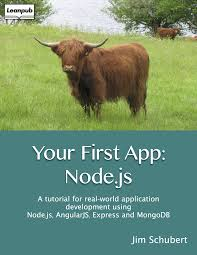


This Book is the top rated Book with 5/5 ratings as per the dataset but till now it has been rated by only 1 user on Goodreads.

In [ ]:
books_reviews = books.sort_values(by=['Reviews'], ascending=False)
books_reviews = books_reviews[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_reviews['Reviews'], books_reviews['Book_title'],palette='CMRmap')
plt.xlabel("Reviews", fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Books with respect to Reviews',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

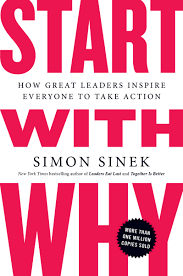

Here, The Top Books is **Start with Why**

The book starts with a comparison of the two main ways to influence human behaviour: manipulation and inspiration. Sinek argues that inspiration is the more powerful and sustainable of the two.

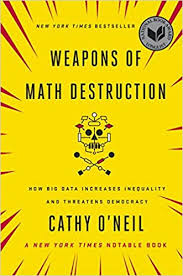

This book **Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy** is on 5 rank by Reviews.

O'Neil, a mathematician, analyses how the use of big data and algorithms in a variety of fields, including insurance, advertising, education, and policing, can lead to decisions that harm the poor, reinforce racism, and amplify inequality.

Now let's find Top rated books with atleast 50 reviews to find the **most popular books**.

In [ ]:
books_top_rr = books_top.loc[books_top.Reviews >=50]
books_top_rr = books_top_rr[0:10]
plt.figure(figsize=(8,10),dpi=200)
ax = sns.barplot(books_top_rr['Rating'], books_top_rr['Book_title'],palette='Paired')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top Rated Books with atleast 50 Reviews',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

In [ ]:
books_price = books.sort_values(by=['Price'], ascending=False)
books_price = books_price[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_price['Price'], books_price['Book_title'],palette='rainbow')
plt.xlabel("Price",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Books with respect to Price',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

In [ ]:
books_pages = books.sort_values(by=['Pages'], ascending=False)
books_pages = books_pages[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_pages['Pages'], books_pages['Book_title'],palette='gist_ncar')
plt.xlabel("Pages",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Books with respect to Pages',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(books_top['Book_title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Now, Let's find most important books for this community related to Data Science, Python and Machine Learning.**

# **Top Data Science/Big Data Books**<a class="anchor" id="4"></a>

In [ ]:
books_data = books[books['Book_title'].str.contains('Data')]
books_data

In [ ]:
books_data = books_data.sort_values(by=['Rating'], ascending=False)
books_data = books_data[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_data['Rating'], books_data['Book_title'],palette='Paired')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Data Science/Big Data Books with respect to Rating',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

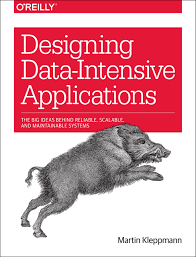

Data is at the center of many challenges in system design today. Difficult issues need to be figured out, such as scalability, consistency, reliability, efficiency, and maintainability. In addition, we have an overwhelming variety of tools, including relational databases, NoSQL datastores, stream or batch processors, and message brokers. What are the right choices for your application? How do you make sense of all these buzzwords?

In this practical and comprehensive guide, author Martin Kleppmann helps you navigate this diverse landscape by examining the pros and cons of various technologies for processing and storing data. Software keeps changing, but the fundamental principles remain the same. With this book, software engineers and architects will learn how to apply those ideas in practice, and how to make full use of data in modern applications.

# **Top Python Books** <a class="anchor" id="5"></a>

In [ ]:
books_python = books[books['Book_title'].str.contains('Python')]
books_python 

In [ ]:
books_python = books_python.sort_values(by=['Rating'], ascending=False)
books_python = books_python[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(books_python['Rating'], books_python['Book_title'],palette='gist_ncar')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Python Books with respect to Rating',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

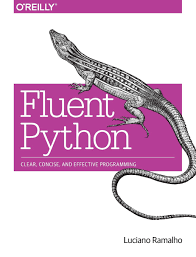

Author Luciano Ramalho takes you through Python's core language features and libraries, and shows you how to make your code shorter, faster, and more readable at the same time. Many experienced programmers try to bend Python to fit patterns they learned from other languages, and never discover Python features outside of their experience. With this book, those Python programmers will thoroughly learn how to become proficient in Python 3

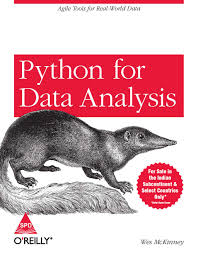

This book **Python for Data Analysis** is on 6th rank in this list and was on 4th rank in Data Science list and also is one of my favourite.
Python for Data Analysis is concerned with the nuts and bolts of manipulating, processing, cleaning, and crunching data in Python. It is also a practical, modern introduction to scientific computing in Python, tailored for data-intensive applications. This is a book about the parts of the Python language and libraries you’ll need to effectively solve a broad set of data analysis problems. This book is not an exposition on analytical methods using Python as the implementation language.

Written by **Wes McKinney**, the **main author of the pandas library**, this hands-on book is packed with practical cases studies. It’s ideal for analysts new to Python and for Python programmers new to scientific computing.


# **Top Machine Learning Books** <a class="anchor" id="6"></a>

In [ ]:
books_ml = books[books['Book_title'].str.contains('Machine')]
books_ml

In [ ]:
books_ml = books_ml.sort_values(by=['Rating'], ascending=False)
books_ml = books_ml[0:10]
plt.figure(figsize=(8,10),dpi=200)
ax = sns.barplot(books_ml['Rating'], books_ml['Book_title'],palette='Paired')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top Machine Learning Books with respect to Rating',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

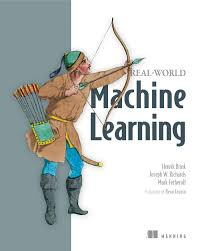

Real-World Machine Learning is a practical guide designed to teach working developers the art of ML project execution. Without overdosing you on academic theory and complex mathematics, it introduces the day-to-day practice of machine learning, preparing you to successfully build and deploy powerful ML systems.

# **Top Kindle Books** <a class="anchor" id="7"></a>

Let's find Top books for Kindle lovers also more specifically Data Science book in Kindle

In [ ]:
books_kindle = books.loc[books.Type.isin(['Kindle Edition'])] 
books_kindle.head()

In [ ]:
books_kindle = books_kindle.sort_values(by=['Rating'], ascending=False)
books_kindle = books_kindle[0:10]
plt.figure(figsize=(8,10),dpi=150)
ax = sns.barplot(books_kindle['Rating'], books_kindle['Book_title'],palette='CMRmap')
plt.xlabel("Ratings",fontsize = 15)
plt.ylabel("Books",fontsize = 15)
plt.title('Top 10 Kindle Books with respect to Rating',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')   
plt.show()

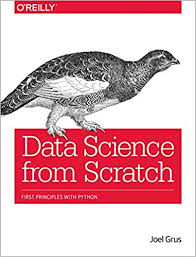

On 7th rank There is **Data Science from Scratch: First Principles with Python**.

In this book, you’ll learn how many of the most fundamental data science tools and algorithms work by implementing them from scratch.

If you have an aptitude for mathematics and some programming skills, author Joel Grus will help you get comfortable with the math and statistics at the core of data science, and with hacking skills you need to get started as a data scientist. Today’s messy glut of data holds answers to questions no one’s even thought to ask. This book provides you with the know-how to dig those answers out.

<img src="https://media4.giphy.com/media/STlnH6tOxoIaUwnmyX/200w.webp?cid=ecf05e47jxhh86fl1jhvrnw0uj0duzkbb1biaktikn3jdoo9&rid=200w.webp">



**If you interested in reading books about Data Science - Have a look at these two amazing source**

**You may also find some mentioned above**

https://www.analyticsvidhya.com/blog/2019/01/27-amazing-data-science-books-every-data-scientist-should-read/

https://towardsdatascience.com/data-science-books-you-must-read-in-2020-1f30daace1cb

<h2 style='background:black; border:0; color:white'><center>Thank You for reading the kernel !</center><h2>
<h2 style='background:black; border:0; color:white'><center>Hope You Liked It !</center><h2>

<h2 style='background:black; border:0; color:white'><center>A special thanks to Thomas Konstantin for this amazing dataset.</center><h2>